Dr. Hamidreza Hajiyani 

Anschrift: Bechemstraße 41, 47058, Duisburg, Deutschland  

E-Mail: Hamid.hajiyani@uni-due.de  

web: https://www.uni-due.de/physik/pentcheva/hamid.php




#  Introduction
In this project we will consentrate of the IBM Sample Data Set for predicting behavior to retain customers. We can analyze all relevant customer data and develop focused customer retention programs. 


#  Computational details:
- For our calculateion we have used the sklearn and keras librareis. For the first we implemented the Gradient Boosting Classifier by optimization of hyperparameters. Then, we also investigated the LogisticRegression method with and without using of SMOTE methodes. Afterwards, we implemented these methods to  the ensemble method of VotingClassifier. In particular we used the LogisticRegression, DecisionTreeClassifier, RandomForestClassifier.  Finally, at the end we developted a Deep learnig model by using of kerasl library to provide a direct comparision with prevous models.  

- To benchmark our models we calculated accuracy, classification report consist of precision, recall and f1-score, confusion matrix and ROC Cuve. Since our dataset has some imbalance, we need a more reliable metric than accuracy to measure our models. Therefore, the area under the ROC curve will be our optimization objective, but we will also look at the accuracy at each experiment.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Computational-details:" data-toc-modified-id="Computational-details:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Computational details:</a></span></li><li><span><a href="#Preprocessing:" data-toc-modified-id="Preprocessing:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing:</a></span><ul class="toc-item"><li><span><a href="#Data-Manipulation:" data-toc-modified-id="Data-Manipulation:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Manipulation:</a></span></li><li><span><a href="#Data-Analysis:" data-toc-modified-id="Data-Analysis:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Analysis:</a></span></li></ul></li><li><span><a href="#Numerical-features." data-toc-modified-id="Numerical-features.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Numerical features.</a></span><ul class="toc-item"><li><span><a href="#Dependence-of-numerical-features-to-Churn" data-toc-modified-id="Dependence-of-numerical-features-to-Churn-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dependence of numerical features to Churn</a></span></li><li><span><a href="#Internal-dependence-of-numerical-features" data-toc-modified-id="Internal-dependence-of-numerical-features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Internal dependence of numerical features</a></span></li></ul></li><li><span><a href="#Distribution-of-categorical-features" data-toc-modified-id="Distribution-of-categorical-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distribution of categorical features</a></span></li><li><span><a href="#Correlation-of-numerical-and-categorical-features:" data-toc-modified-id="Correlation-of-numerical-and-categorical-features:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation of numerical and categorical features:</a></span><ul class="toc-item"><li><span><a href="#InternetService-versus-MonthlyCharges" data-toc-modified-id="InternetService-versus-MonthlyCharges-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>InternetService versus MonthlyCharges</a></span></li><li><span><a href="#InternetService-versus-Totalchages" data-toc-modified-id="InternetService-versus-Totalchages-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>InternetService versus Totalchages</a></span></li><li><span><a href="#Contract-versus-Totalchages" data-toc-modified-id="Contract-versus-Totalchages-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Contract versus Totalchages</a></span></li><li><span><a href="#Correlation-heatmap-(Pearson-method)" data-toc-modified-id="Correlation-heatmap-(Pearson-method)-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Correlation heatmap (Pearson method)</a></span></li></ul></li><li><span><a href="#Feature-selection-and-prediction" data-toc-modified-id="Feature-selection-and-prediction-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature selection and prediction</a></span><ul class="toc-item"><li><span><a href="#Synthetic-Minority-oversampling-Technique--(SMOTE)" data-toc-modified-id="Synthetic-Minority-oversampling-Technique--(SMOTE)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Synthetic Minority oversampling Technique  (SMOTE)</a></span></li></ul></li><li><span><a href="#Model-adjustments-in-ensemble-methods:-Voting-classifier" data-toc-modified-id="Model-adjustments-in-ensemble-methods:-Voting-classifier-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model adjustments in ensemble methods: Voting classifier</a></span></li></ul></div>

In [112]:
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import pandas as pd



from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve




from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import auc
from sklearn.metrics import roc_curve



from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
SEED = 1



import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# Preprocessing:

## Data Manipulation:
Aflter loading of data we removed missing datas on TotalCharges column. customerID was also removed. We also checked which categories do we have in our features. We have 3 numerical colimns and the rest are categorical.

We also ceheck the ration of Churn and No charn.

In [78]:
#lead the dataset
df = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')

#print(df.keys())
print('Intial number of rows:', df.shape )

# remove the 'customerID' from the list.
df.drop(['customerID'],axis=1, inplace=True)

# replace the space with nan and remove the non from rows.
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df = df[df['TotalCharges'].notnull()]
df['TotalCharges'] = df['TotalCharges'].astype(float)
print('Number of rows after removing empty spaces:', df.shape)
df.head()

Intial number of rows: (7043, 21)
Number of rows after removing empty spaces: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Analysis:
 
- At the first step we look and the radio of Chrun versus No_Churn. As can be seen from Fig. 1 the data are slighlty imbalacend. Relative disfrribution of Churn vesus No_Churn is 73.4 to 26.5 percent respectively. 



Percent of No Churn 73.42150170648463
Percent of Churn 26.578498293515356


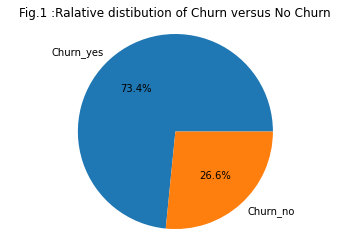

In [79]:
# The classes are heavily skewed we need to solve this issue later.
Churn_yes = df['Churn'].value_counts()[0]/len(df) * 100
Churn_no = df['Churn'].value_counts()[1]/len(df) * 100
print('Percent of No Churn', Churn_yes)
print('Percent of Churn', Churn_no)

sizes = [Churn_yes, Churn_no ]
labels = ['Churn_yes', 'Churn_no']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.set_title('Fig.1 :Ralative distibution of Churn versus No Churn', fontsize=12)
ax1.axis('equal')
plt.show()

# Save the full figure...
fig1.savefig('fig1.png')


In [80]:

# we have 16 binary columns
binary_col = [ 'gender','SeniorCitizen' , 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

numeric_col = ['TotalCharges', 'MonthlyCharges', 'tenure']


for var in binary_col:
    df[var] = df[var].replace('No phone service' , 'No')
    df[var] = df[var].replace('No internet service' , 'No')
    df[var] = df[var].astype("category")
    #df[var] = df[var].cat.codes
    #print(var, df[var].unique())
    #df[var] = df[var].astype("category")
    
#df[var] = df[var].cat.codes

#df.head()

# Numerical features.

## Dependence of numerical features to Churn

- There are three numerical columns. We investigate the relative distribution of each numerical feature separatly for the Churn and No_Churn data. As can be seen from Fig. 2a and b) low TotalCharges (around 0) and high MonthlyCharges (from 70 to 100) is more likely to be churn. Tenure results in Fig.2c) shows that low tenure is more churn costumers at tenure of more than 50 has a higher chance of No Churn.

- For the numerical columns we have used the sandardscales. You can see from Fig.2e to 2g that the distribution is kept similar just the scale has reduces. However, our investigations showed that it has a minimal effects on the results.


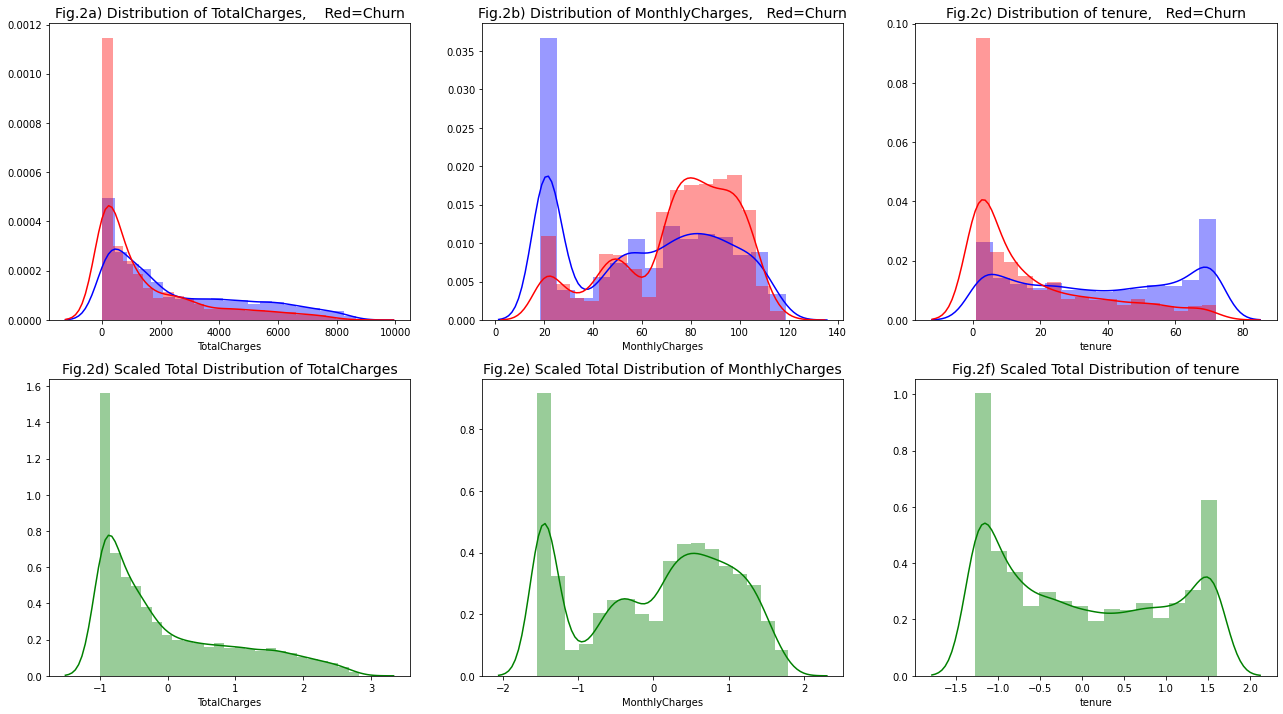

In [81]:
fig, ax = plt.subplots(2, 3, figsize=(22,12))
dfcat=pd.DataFrame()

for var in binary_col:
    df[var] = df[var].astype("category")
    df[var] = df[var].cat.codes
    #print(var, df[var].unique())
    #df[var] = df[var].astype("category")    
#df[var] = df[var].cat.codes


#df['TotalCharges'] = df['TotalCharges'].astype(float)

df_churn0 = df.loc[df['Churn']== 0]
df_churn1 = df.loc[df['Churn']== 1]
       

sn.distplot(df_churn0['TotalCharges'], ax=ax[0,0], color='b', label="0")
sn.distplot(df_churn1['TotalCharges'], ax=ax[0,0], color='r', label="1")
ax[0,0].set_title('Fig.2a) Distribution of TotalCharges,    Red=Churn', fontsize=14)

sn.distplot(df_churn0['MonthlyCharges'], ax=ax[0,1], color='b', label="churn0")
sn.distplot(df_churn1['MonthlyCharges'], ax=ax[0,1], color='r', label="churn1")
ax[0,1].set_title('Fig.2b) Distribution of MonthlyCharges,   Red=Churn', fontsize=14)


sn.distplot(df_churn0['tenure'], ax=ax[0,2], color='b', label="churn0")
sn.distplot(df_churn1['tenure'], ax=ax[0,2], color='r', label="churn1")
ax[0,2].set_title('Fig.2c) Distribution of tenure,   Red=Churn', fontsize=14)



df_std = pd.DataFrame(StandardScaler().fit_transform(df[numeric_col].astype('float64')),
                       columns=numeric_col)

sn.distplot(df_std['TotalCharges'], ax=ax[1,0], color='g')
ax[1,0].set_title('Fig.2d) Scaled Total Distribution of TotalCharges', fontsize=14)

sn.distplot(df_std['MonthlyCharges'], ax=ax[1,1], color='g')
ax[1,1].set_title('Fig.2e) Scaled Total Distribution of MonthlyCharges', fontsize=14)


sn.distplot(df_std['tenure'], ax=ax[1,2], color='g')
ax[1,2].set_title('Fig.2f) Scaled Total Distribution of tenure', fontsize=14)


# Save the full figure...
fig.savefig('fig2.png')


## Internal dependence of numerical features
Numerical features can be internally correlated. Therefore, we illustrate the pair plot of these features. Are can see here, we can observe boundary and clustering for these features. 


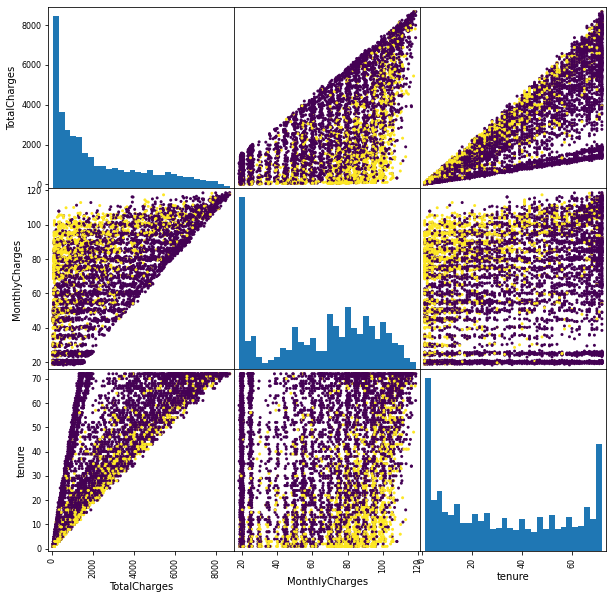

In [82]:
numeric_columns = ['TotalCharges', 'MonthlyCharges', 'tenure']
color = df['Churn'].tolist()

# Make a scatter matrix of numeric columns
my_scatter = pd.plotting.scatter_matrix(df[numeric_columns], c=color , facecolor ='rgb' , hist_kwds={'bins':30},
                           # Make figure large to show details
                           figsize = [10,10], 
                           # Lower point opacity to show overlap
                           alpha = 1.8)

#
# Save the figure (this can also be a path). As it stands now it will save in this codes directory.
plt.savefig('fig3.png')


# Distribution of categorical features
To get more insight toward categorical features we calculate the percentage of constumers that are (No)-churn and have that specific feature or not. Which can be categoriezed into 4 group of:


'NoChurn_Nofeature', 'Chrun_Nofeature','NoChurn_feature','Churn_feature'.


Of course sum of these group is 100 percent. Our analysis cotain valuable informations:

- Only around 15% of the costumers are SeniorCitizens which is the minimum feature. But 40 percent of are chrun.

- Only 8% of costumers have no Phoneservice. So we can conclude that is is not a important feature. 

- For the gender also the ration of churn peoples for mens and womens are both around 50 percent.

- For the partner, around 1/2 of people with no patner are churn. But around 1/3 for people with partner are churn. 

- The pieplot for the PaymentMethod indicates that more that half of churn poeple use the electronic check at most and Mailed check at least. However, the No churn people use different methods equally. 

In [83]:
list1= []
dict1 = {}
# we have 13 binary columns
binary_col = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',  'PaperlessBilling',
       ]

for k in binary_col:
    list1= []
    for i in range(2):        
        for j in range(2):        
            num = (df.loc[(df[k]== i) & (df['Churn']== j)].shape[0]) * 100 /(df.loc[df['Churn']].shape[0])
            list1.append(num)
        #dict1[i]=list1
    #print(list1)
    dict1[k]=list1
dict1
#dicttotal[k].update(dict1[k])
    

dfss = pd.DataFrame.from_dict(dict1, columns=['NoChurn_Nofeature', 'Chrun_Nofeature','NoChurn_feature','Churn_feature' ], orient='index') 
dfss.index.name = 'feature'
dfs = dfss.sort_values('NoChurn_Nofeature', ascending=False)
dfs


,NoChurn_Nofeature,Chrun_Nofeature,NoChurn_feature,Churn_feature
feature,,,,
SeniorCitizen,63.950512,19.809443,9.470990,6.769056
OnlineSecurity,48.961889,22.383390,24.459613,4.195108
TechSupport,48.819681,22.170080,24.601820,4.408419
Dependents,48.208191,21.942548,25.213311,4.635950
DeviceProtection,46.786121,18.828214,26.635381,7.750284
StreamingTV,46.558589,15.002844,26.862912,11.575654
OnlineBackup,46.373720,19.141069,27.047782,7.437429
StreamingMovies,46.217292,14.945961,27.204209,11.632537
MultipleLines,43.316268,14.490899,30.105233,12.087600


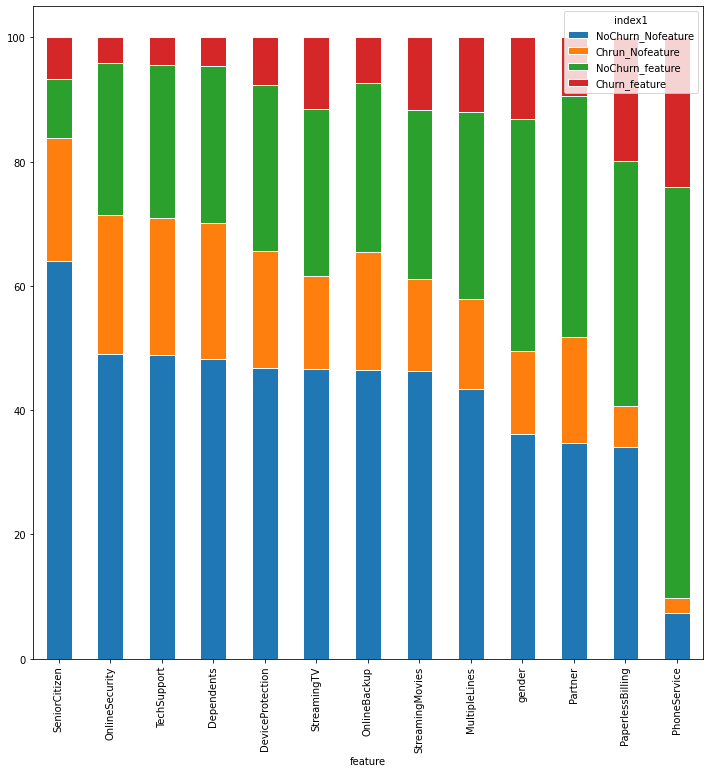

In [84]:
dfh = dfs.T
dfh['index1']= dfh.index
dfh.set_index('index1').T.plot(kind='bar', stacked=True, figsize=(12, 12), edgecolor='w')
plt.savefig('fig4.png')




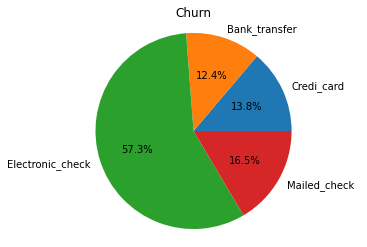

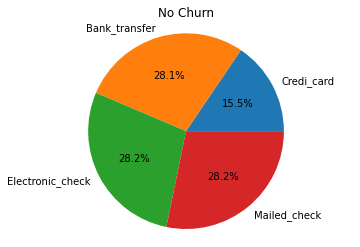

In [85]:

df_churn0 = df.loc[df['Churn']== 0]
df_churn1 = df.loc[df['Churn']== 1]

Credi_card = df_churn1['PaymentMethod'].value_counts()[0]/len(df[df['Churn'] == 1]) * 100
Bank_transfer = df_churn1['PaymentMethod'].value_counts()[1]/len(df[df['Churn'] == 1]) * 100
Electronic_check = df_churn1['PaymentMethod'].value_counts()[2]/len(df[df['Churn'] == 1]) * 100
Mailed_check = df_churn1['PaymentMethod'].value_counts()[3]/len(df[df['Churn'] == 1]) * 100



sizes = [Credi_card, Bank_transfer, Electronic_check, Mailed_check ]
labels = ["Credi_card", "Bank_transfer", "Electronic_check", "Mailed_check"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.set_title('Churn', fontsize=12)
ax1.axis('equal')
plt.show()
fig1.savefig('fig5.png')


Credit_card  = df_churn0['PaymentMethod'].value_counts()[0]/len(df[df['Churn'] == 0]) * 100
Bank_transfer = df_churn0['PaymentMethod'].value_counts()[1]/len(df[df['Churn'] == 0]) * 100
Electronic_check = df_churn0['PaymentMethod'].value_counts()[2]/len(df[df['Churn'] == 0]) * 100
Mailed_check = df_churn0['PaymentMethod'].value_counts()[3]/len(df[df['Churn'] == 0]) * 100


sizes = [Credi_card, Bank_transfer, Electronic_check, Mailed_check ]
labels = ["Credi_card", "Bank_transfer", "Electronic_check", "Mailed_check"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.set_title('No Churn', fontsize=12)
ax1.axis('equal')
plt.show()
fig1.savefig('fig6.png')


# Correlation of numerical and categorical features:
seaborn.catplot provides access to investigate relashionship between a numerical and categorical freatures




## InternetService versus MonthlyCharges
- People that use the DSL with MonthlyCharges more than 60 are more likely to be No Churn.
- For the Fiber optic InternetService this number should be more than 100.




## InternetService versus Totalchages
- For DSL users when the TotalCharges are higher that 1800, the No Chrun is more likely, however, for Fiber optic InternetService this number is around 4000. 



## Contract versus Totalchages
- Short term contracts has higher chance to be No churn but when the contract is longer it has higher chance to be churn.

/home/hamid/.local/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


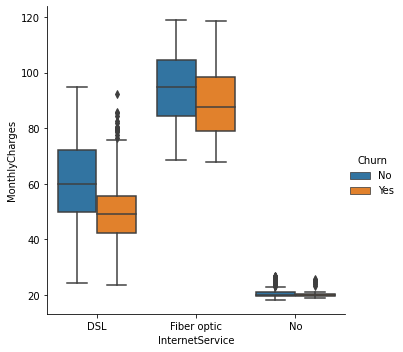

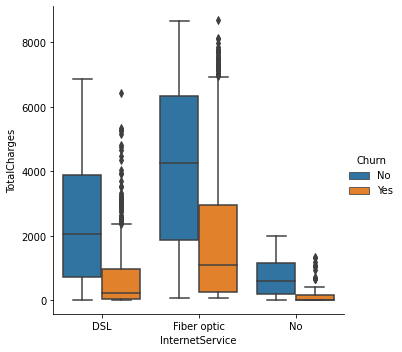

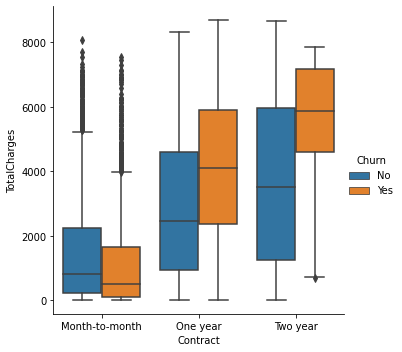

In [69]:
import seaborn as sn
import matplotlib.pyplot as plt


sn.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="box", data=df)
#snset_title('InternetService versus MonthlyCharges', fontsize=14)
plt.savefig("fig9.png")
#ax2 = fig.add_subplot(122)
sns_plot = sn.catplot(x="InternetService", y="TotalCharges", hue="Churn", kind="box", data=df)
#ax[1].set_title('InternetService versus Totalchages', fontsize=14)
plt.savefig("fig10.png")
sns_plot = sn.catplot(x="Contract", y="TotalCharges", hue="Churn", kind="box", data=df, ax=ax[2])
#ax[2].set_title('Contract versus Totalchages', fontsize=14)
plt.savefig("fig11.png")



## Correlation heatmap (Pearson method)


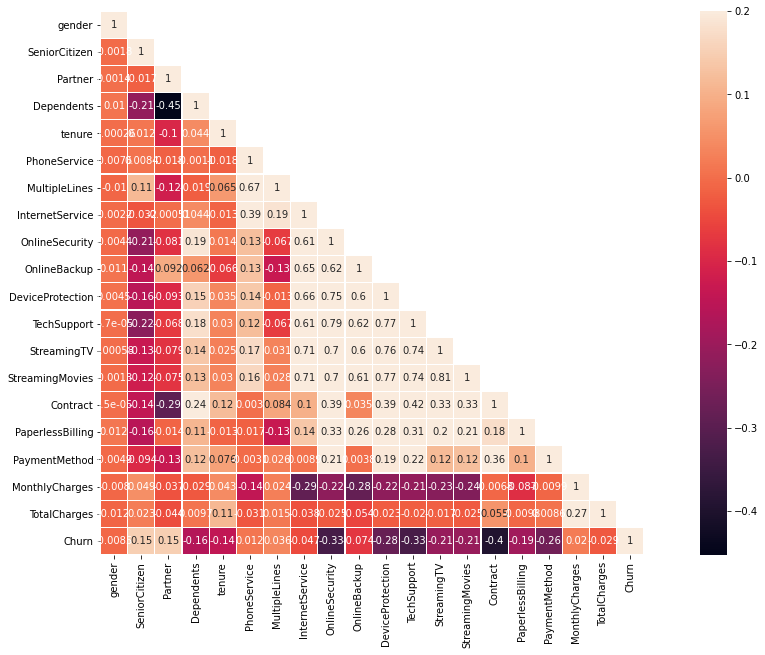

In [72]:
corrMatt = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=0.2, square=True, annot=True,  linewidths=.2)
plt.savefig("fig12.png")


# Feature selection and prediction

We want to check what is the most important parameter for the Churn. We have 3 colums with more that 2 categorical features. Therefore, we need to do one_hot_encoding.

In [114]:

def roc(model, X_test,y_test):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    

def fig(sorted_importances, conf_mat, model):
    fig, ax = plt.subplots(1, 3, figsize=(22,4))
    sn.barplot(y=sorted_importances.index, x=sorted_importances.values,  orient='h', ax=ax[0])
    ax[0].set_title('Feature Selection', fontsize=18)
    sn.heatmap(conf_mat, ax=ax[1], annot=True, fmt="d",cmap="YlGnBu", vmin=0, vmax=1392)
    ax[1].set_title('Confusion matrix', fontsize=18)
    (roc(model, X_test,y_test))
    ax[2].set_title('ROC', fontsize=18)
    fig.savefig('fig20.png')

 



In [115]:
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')
#print(df.keys())
#print('Intial number of rows:', df.shape )

# remove the 'customerID' from the list.
df.drop(['customerID'],axis=1, inplace=True)

# replace the space with nan and remove the non from rows.
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df = df[df['TotalCharges'].notnull()]
df['TotalCharges'] = df['TotalCharges'].astype(float)
#print('Number of rows after removing empty spaces:', df.shape)


numeric_col = ['TotalCharges', 'MonthlyCharges', 'tenure']


df_std = pd.DataFrame(StandardScaler().fit_transform(df[numeric_col].astype('float64')),
                       columns=numeric_col)

dr22 = df.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)
df = pd.concat([df_std, dr22], axis=1, join='inner')
df = pd.get_dummies(df)

# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']

X, y = df.drop(drop,axis=1), df['Churn_Yes']
#X.head()


Best hyerparameters:
 {'max_depth': 1, 'max_features': 0.1, 'n_estimators': 100, 'subsample': 0.4}
ROC AUC score: 0.69
Classifcation report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1546
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2107
   macro avg       0.72      0.69      0.70      2107
weighted avg       0.77      0.78      0.77      2107

Confusion matrix_sgbt:
 [[1377  169]
 [ 289  272]]


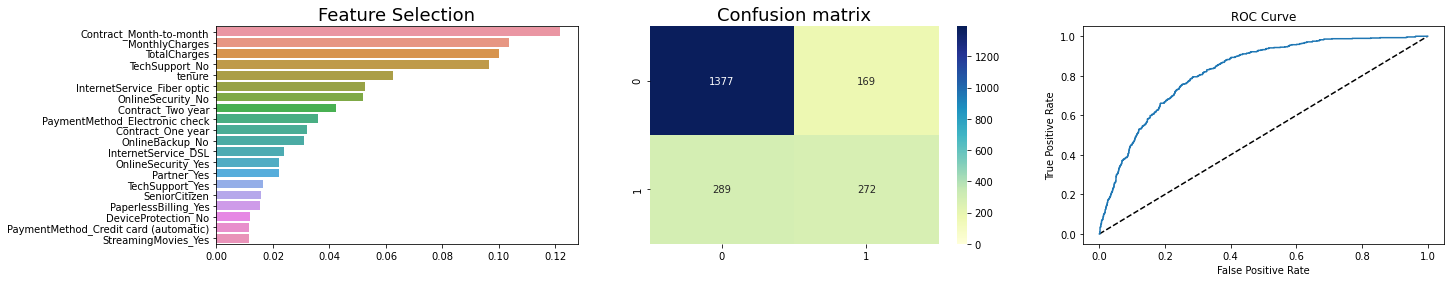

In [116]:

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.3,
                                    random_state=SEED)

# Instantiate a stochastic GradientBoostingClassifier 'sgbt'
sgbt = GradientBoostingClassifier(max_depth=4, 
                                subsample=0.4,
                                max_features=0.2,
                                n_estimators=100,
                                random_state=SEED)

# Define the dictionary 'params_rf'
params_sgbt = {
             'n_estimators': [100, 150 ],
             'max_depth': [1, 2, 4],
             'max_features': [0.1, 0.2], 
             'subsample': [0.2, 0.4]
             }

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=sgbt,
                       param_grid=params_sgbt,
                       scoring='accuracy',
                       cv=3,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_

print('Best hyerparameters:\n', best_hyperparams)


# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute roc_auc_score
rmse_test = roc_auc_score(y_test, y_pred)


# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred = sgbt.predict(X_test)

# Evaluate test-set roc_auc_score
sgbt_roc_auc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(sgbt_roc_auc_score))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat_sgbt = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix_sgbt:\n', conf_mat_sgbt)


y_pred_sgbt = sgbt.predict_proba(X_test)[:, 1]
fpr_sgbt, tpr_sgbt, thresholds_sgbt = roc_curve(y_test, y_pred_sgbt)
auc_sgbt = auc(fpr_sgbt, tpr_sgbt)

# Plot features importances, just the top 20 features
importances_sgbt = pd.Series(data= sgbt.feature_importances_.reshape(40), index= X_train.columns)
sorted_importances_sgbt = importances_sgbt.sort_values(ascending=False).head(20)


fig(sorted_importances_sgbt, conf_mat_sgbt, sgbt )





              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1546
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2107
   macro avg       0.74      0.71      0.72      2107
weighted avg       0.79      0.79      0.79      2107

Confusion matrix_lr:
 [[1369  177]
 [ 257  304]]


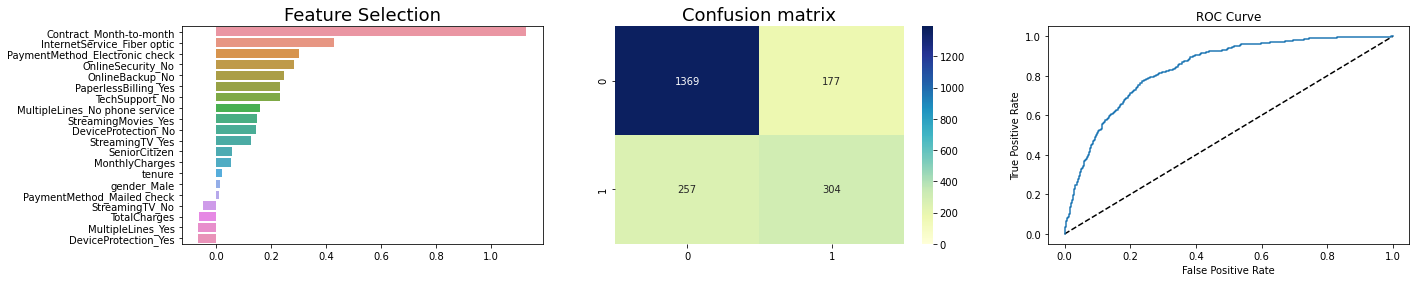

In [117]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Create the classifier: logreg
lr = LogisticRegression()

# Fit the classifier to the training data
lr.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = lr.predict(X_test)

# Compute and print the confusion matrix and classification report
conf_mat_lr = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Confusion matrix_lr:\n', conf_mat_lr)


#Plot features importances, just the top 20 features
importances_lr = pd.Series(data= lr.coef_.reshape(40), index= X_train.columns)
sorted_importances_lr = importances_lr.sort_values(ascending=False).head(20)
y_pred = lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred)
auc_lr = auc(fpr_lr, tpr_lr)


fig(sorted_importances_lr, conf_mat_lr, lr)





## Synthetic Minority oversampling Technique  (SMOTE)
Uses the characteristics of nearest neighbours of minory cases to creat new synthetic of fraud cases and avoid duplicating. 
-Resampling should be applied on the training set.
do the training and test set and then resample the traning set.

If you want to do the cross validation, you should do it first and then do the oversampling or under sampling.

In [105]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X_train, y_train)


# Create the classifier: logreg
lr_s = LogisticRegression( max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Fit the classifier to the training data
lr_s.fit(X_resampled, y_resampled)

# Predict the labels of the test set: y_pred
y_pred = lr_s.predict(X_test)

# Compute and print the confusion matrix and classification report
conf_mat_lr_s = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Confusion matrix_lr_s:\n', conf_mat_lr)


#Plot features importances, just the top 20 features
importances_lr = pd.Series(data= lr_s.coef_.reshape(40), index= X_train.columns)
sorted_importances_lr = importances_lr.sort_values(ascending=False).head(20)
y_pred = lr_s.predict_proba(X_test)[:,1]
fpr_lr_s, tpr_lr_s, thresholds_lr_s = roc_curve(y_test, y_pred)
auc_lr_s = auc(fpr_lr_s, tpr_lr_s)





              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1546
           1       0.56      0.70      0.62       561

    accuracy                           0.77      2107
   macro avg       0.72      0.75      0.73      2107
weighted avg       0.79      0.77      0.78      2107

Confusion matrix_lr_s:
 [[1369  177]
 [ 257  304]]


# Model adjustments in ensemble methods: Voting classifier

A simple way to adjust our models to deal with imbalanced data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.
Adjusting your Random Forest to fraud detection. We'll define weights manually, to be able to off-set that imbalance slightly. In our case we have 25 percent churn to 75 non-churn cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier


def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  #probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  #print('Confusion matrix_ensemble:\n', conf_mat_ensemble)
  conf_mat_ensemble = confusion_matrix(y_test, y_pred)
  return conf_mat_ensemble


# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:1}, random_state=SEED, max_iter=1000)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=SEED)
clf3 = DecisionTreeClassifier(random_state=SEED, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard', weights=[1, 1, 1])


# Predict the labels of the test set: y_pred
y_pred = ensemble_model.fit(X_train, y_train).predict(X_test)

# Compute and print the confusion matrix and classification report
conf_mat_ensemble = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Confusion matrix_ensemble:\n', conf_mat_lr)


              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1546
           1       0.51      0.67      0.58       561

    accuracy                           0.74      2107
   macro avg       0.69      0.72      0.70      2107
weighted avg       0.77      0.74      0.75      2107

Confusion matrix_ensemble:
 [[1369  177]
 [ 257  304]]


# Deep learning method:

In [108]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization


# Set a random seed
n_inputs = X_train.shape[1]

# Return a new model with the given activation
 
model = Sequential()
model.add(Dense(n_inputs, input_shape=(n_inputs,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1640      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,061
Trainable params: 2,061
Non-trainable params: 0
_________________________________________________________________


In [109]:
from keras.wrappers.scikit_learn import KerasClassifier
model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

from sklearn.metrics import roc_curve
y_pred = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

y_pred_round = (model.predict(X_test).round(0).astype(int))

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

#Compute and print the confusion matrix and classification report
conf_deep = confusion_matrix(y_test, y_pred_round)
print(classification_report(y_test, y_pred_round))
print('Confusion matrix_deep:\n', conf_deep)



Train on 4914 samples
Epoch 1/5
4914/4914 [==============================] - 2s 363us/sample - loss: 0.5577 - accuracy: 0.7141
Epoch 2/5
4914/4914 [==============================] - 0s 25us/sample - loss: 0.4670 - accuracy: 0.7705
Epoch 3/5
4914/4914 [==============================] - 0s 27us/sample - loss: 0.4487 - accuracy: 0.7798
Epoch 4/5
4914/4914 [==============================] - 0s 26us/sample - loss: 0.4420 - accuracy: 0.7849
Epoch 5/5
4914/4914 [==============================] - 0s 24us/sample - loss: 0.4375 - accuracy: 0.7841
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1546
           1       0.63      0.59      0.61       561

    accuracy                           0.80      2107
   macro avg       0.74      0.73      0.74      2107
weighted avg       0.79      0.80      0.80      2107

Confusion matrix_deep:
 [[1352  194]
 [ 232  329]]


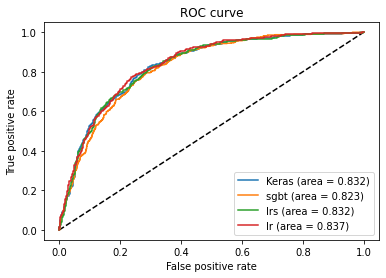

<Figure size 432x288 with 0 Axes>

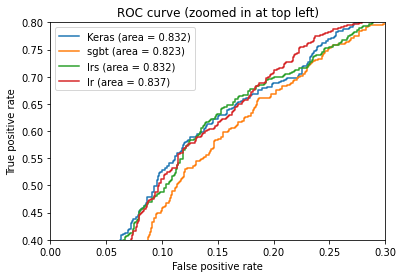

<Figure size 432x288 with 0 Axes>

In [125]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_sgbt, tpr_sgbt, label='sgbt (area = {:.3f})'.format(auc_sgbt))
plt.plot(fpr_lr_s, tpr_lr_s, label='lrs (area = {:.3f})'.format(auc_lr_s))
plt.plot(fpr_lr, tpr_lr, label='lr (area = {:.3f})'.format(auc_lr))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig("fig21.png")


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.3)
plt.ylim(0.4, 0.8)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_sgbt, tpr_sgbt, label='sgbt (area = {:.3f})'.format(auc_sgbt))
plt.plot(fpr_lr_s, tpr_lr_s, label='lrs (area = {:.3f})'.format(auc_lr_s))
plt.plot(fpr_lr, tpr_lr, label='lr (area = {:.3f})'.format(auc_lr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
plt.savefig("fig31.png")


In [111]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
def roc(X_test,y_test, fpr,tpr):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = logreg.predict_proba(X_test)[:,1]
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
  

    
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))
    
    
def heatmap(conf_mat_lr):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sn.heatmap(pd.DataFrame(conf_mat_lr), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')